In [1]:
import pandas as pd
import numpy as np
import os,datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium as fm
from folium.plugins import MarkerCluster, HeatMap
# pip install folium - to install folium

In [2]:
# Download the dataset here - https://data.montgomerycountymd.gov/Public-Safety/Traffic-Violations/4mse-ku6q
traffic = pd.read_csv('Traffic_Violations.csv')
traffic.shape

/Users/richmond/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (19,20,21,22,23,24,25,34) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(1773774, 43)

In [3]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1773774 entries, 0 to 1773773
Data columns (total 43 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   SeqID                    object 
 1   Date Of Stop             object 
 2   Time Of Stop             object 
 3   Agency                   object 
 4   SubAgency                object 
 5   Description              object 
 6   Location                 object 
 7   Latitude                 float64
 8   Longitude                float64
 9   Accident                 object 
 10  Belts                    object 
 11  Personal Injury          object 
 12  Property Damage          object 
 13  Fatal                    object 
 14  Commercial License       object 
 15  HAZMAT                   object 
 16  Commercial Vehicle       object 
 17  Alcohol                  object 
 18  Work Zone                object 
 19  Search Conducted         object 
 20  Search Disposition       object 
 21  Search O

In [4]:
traffic.head()

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,fbc324ab-bc8d-4743-ba23-7f9f370005e1,08/11/2019,20:02:00,MCP,"2nd District, Bethesda","LEAVING UNATTENDED VEH. W/O STOPPING ENGINE, L...",CORDELL ST @ NORFOLK AVE.,38.989743,-77.097770,No,...,21-1101(a),Transportation Article,False,BLACK,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(38.9897433333333, -77.09777)"
1,a6d904ec-d666-4bc3-8984-f37a4b31854d,08/12/2019,13:41:00,MCP,"2nd District, Bethesda",EXCEEDING POSTED MAXIMUM SPEED LIMIT: 85 MPH I...,NBI270 AT MIDDLEBROOK RD,39.174110,-77.246170,No,...,21-801.1,Transportation Article,False,WHITE,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.17411, -77.24617)"
2,54a64f6a-df28-4b65-a335-08883866aa46,08/12/2019,21:00:00,MCP,"5th District, Germantown",DRIVING VEH W/ TV-TYPE RECEIVING VIDEO EQUIP T...,MIDDLEBROOK AN 355,39.182015,-77.238221,No,...,21-1129,Transportation Article,False,BLACK,M,GAITHERSBURG,MD,MD,A - Marked Patrol,"(39.1820155, -77.2382213333333)"
3,cf5479b6-9bc7-4216-a7b2-99e57ae932af,08/12/2019,21:43:00,MCP,"5th District, Germantown",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,GERMANTOWN RD AND ALE HOUSE,39.160508,-77.284023,No,...,13-401(h),Transportation Article,False,BLACK,M,GERMANTOWN,MD,MD,A - Marked Patrol,"(39.1605076666667, -77.284023)"
4,5601ca35-8ee7-4f8e-9208-d89cde96d469,08/12/2019,21:30:00,MCP,"2nd District, Bethesda",FAILURE OF LICENSEE TO NOTIFY ADMINISTRATION O...,EASTWEST/ 355,38.984247,-77.090548,No,...,16-116(a),Transportation Article,False,BLACK,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(38.9842466666667, -77.0905483333333)"


> #### What are the top 5 traffic stop violations ?

In [5]:
traffic['Description'].value_counts().head(5)

DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS                   147486
FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER                            81098
DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGISTRATION                                        53011
FAILURE OF INDIVIDUAL DRIVING ON HIGHWAY TO DISPLAY LICENSE TO UNIFORMED POLICE ON DEMAND     46610
DRIVER USING HANDS TO USE HANDHELD TELEPHONE WHILEMOTOR VEHICLE IS IN MOTION                  43177
Name: Description, dtype: int64

#### Let's look at Traffic Violations and car color


In [6]:
traffic['Color'].value_counts()

BLACK          367016
SILVER         322035
WHITE          282118
GRAY           206338
RED            136849
BLUE           129611
GREEN           59070
GOLD            51976
BLUE, DARK      37297
TAN             33358
MAROON          29696
BLUE, LIGHT     21903
BEIGE           18668
GREEN, DK       17369
GREEN, LGT       9285
BROWN            7822
YELLOW           6476
ORANGE           6196
BRONZE           3887
PURPLE           3253
MULTICOLOR       1325
CREAM            1042
COPPER            534
PINK              253
CHROME             44
CAMOUFLAGE         36
Name: Color, dtype: int64

In [7]:
traffic['Date Of Stop'].value_counts().head(5)

03/17/2015    1281
04/10/2018    1277
05/20/2014    1222
03/05/2019    1186
04/18/2018    1185
Name: Date Of Stop, dtype: int64

In [8]:
traffic[['Color','Date Of Stop','Location']].value_counts()

Color   Date Of Stop  Location                             
GRAY    04/27/2017    ARCOLA AT PARKER                         59
SILVER  12/11/2021    CHERRY HILL RD AND BROADBIRCH DR         46
        01/06/2020    NEW HAMPSHIRE AVE @ OAKLAWN DR           43
BROWN   12/04/2016    4308 LYNBROOK DR BETHESDA MD 20814       43
MAROON  03/25/2014    4020 POSTGATE TER (VEH PURSUIT)          42
                                                               ..
RED     03/24/2015    BATCHELLORS FOREST RD AND GEORGIA AVE     1
BLUE    05/06/2013    GRUBB ROAD / SPENCER ROAD                 1
RED     03/24/2015    8800 BLK PINEY BRANCH ROAD                1
                      495 OUTER LOOP @ EXIT 30                  1
GREEN   05/15/2019    SB GEORGIA AVE / HEWITT AVE               1
Length: 901226, dtype: int64

In [9]:
traffic[['Color','Location']].value_counts()

Color   Location                            
BLACK   WAYNE AVE @ DALE DR                     595
        IS 370 @ IS 270                         451
SILVER  MONTGOMERY VILLAGE AVE @ RUSSELL AVE    451
        WAYNE AVE @ DALE DR                     450
        COLESVILLE RD @ GEORGIA AVE             443
                                               ... 
GRAY    TILDEN LA/ROSELAND DR                     1
        TILDEN LA/LUXAMONOR RD                    1
        TILDEN LA AT OLD STAGE RD                 1
        TILDEN LA AT MARCLIFF RD                  1
GREEN   GEORGIA AVE / RIPPLING BROOK DR           1
Length: 487116, dtype: int64

In [10]:
traffic['Location'].value_counts().head(5)

WAYNE AVE @ DALE DR                     2311
MONTGOMERY VILLAGE AVE @ RUSSELL AVE    2162
IS 370 @ IS 270                         1982
W/B IS 370 @ IS 270                     1884
WOODFIELD RD @ EMORY GROVE RD           1872
Name: Location, dtype: int64

#### What are the most Counted Values by time frame

In [11]:
traffic['date_time'] = traffic['Date Of Stop'] + ' '+ traffic['Time Of Stop']
traffic.head(5)

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,...,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation,date_time
0,fbc324ab-bc8d-4743-ba23-7f9f370005e1,08/11/2019,20:02:00,MCP,"2nd District, Bethesda","LEAVING UNATTENDED VEH. W/O STOPPING ENGINE, L...",CORDELL ST @ NORFOLK AVE.,38.989743,-77.097770,No,...,Transportation Article,False,BLACK,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(38.9897433333333, -77.09777)",08/11/2019 20:02:00
1,a6d904ec-d666-4bc3-8984-f37a4b31854d,08/12/2019,13:41:00,MCP,"2nd District, Bethesda",EXCEEDING POSTED MAXIMUM SPEED LIMIT: 85 MPH I...,NBI270 AT MIDDLEBROOK RD,39.174110,-77.246170,No,...,Transportation Article,False,WHITE,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.17411, -77.24617)",08/12/2019 13:41:00
2,54a64f6a-df28-4b65-a335-08883866aa46,08/12/2019,21:00:00,MCP,"5th District, Germantown",DRIVING VEH W/ TV-TYPE RECEIVING VIDEO EQUIP T...,MIDDLEBROOK AN 355,39.182015,-77.238221,No,...,Transportation Article,False,BLACK,M,GAITHERSBURG,MD,MD,A - Marked Patrol,"(39.1820155, -77.2382213333333)",08/12/2019 21:00:00
3,cf5479b6-9bc7-4216-a7b2-99e57ae932af,08/12/2019,21:43:00,MCP,"5th District, Germantown",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,GERMANTOWN RD AND ALE HOUSE,39.160508,-77.284023,No,...,Transportation Article,False,BLACK,M,GERMANTOWN,MD,MD,A - Marked Patrol,"(39.1605076666667, -77.284023)",08/12/2019 21:43:00
4,5601ca35-8ee7-4f8e-9208-d89cde96d469,08/12/2019,21:30:00,MCP,"2nd District, Bethesda",FAILURE OF LICENSEE TO NOTIFY ADMINISTRATION O...,EASTWEST/ 355,38.984247,-77.090548,No,...,Transportation Article,False,BLACK,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(38.9842466666667, -77.0905483333333)",08/12/2019 21:30:00


In [12]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

In [13]:
traffic['date'] = traffic['date_time'].dt.strftime('%m/%d/%Y')
traffic['Time'] = traffic['date_time'].dt.strftime('%H:%M')
traffic['Day']=traffic['date_time'].dt.strftime('%A')
traffic['Month']=traffic['date_time'].dt.strftime('%B')

In [14]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1773774 entries, 0 to 1773773
Data columns (total 48 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   SeqID                    object        
 1   Date Of Stop             object        
 2   Time Of Stop             object        
 3   Agency                   object        
 4   SubAgency                object        
 5   Description              object        
 6   Location                 object        
 7   Latitude                 float64       
 8   Longitude                float64       
 9   Accident                 object        
 10  Belts                    object        
 11  Personal Injury          object        
 12  Property Damage          object        
 13  Fatal                    object        
 14  Commercial License       object        
 15  HAZMAT                   object        
 16  Commercial Vehicle       object        
 17  Alcohol                  ob

###### As you can see we've changed the data type of the date column todatetime64[ns]

###### Which Traffic Violation has the highest counts by the Day of week 

In [15]:
traffic_by_day = traffic['Day'].value_counts()
traffic_by_day

Tuesday      311615
Wednesday    289144
Friday       275043
Thursday     275019
Monday       238114
Saturday     202830
Sunday       182009
Name: Day, dtype: int64

In [16]:
traffic[["Description",'Day']].value_counts().head(10)

Description                                                                 Day      
DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS  Tuesday      27831
                                                                            Wednesday    24272
                                                                            Thursday     24153
                                                                            Friday       23854
                                                                            Monday       21533
FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER          Tuesday      14802
DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS  Saturday     13758
FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER          Wednesday    13295
                                                                            Thursday     12570
                                                           

In [17]:
from pandas.api.types import CategoricalDtype
day_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_the_week = CategoricalDtype(categories=day_week, ordered = True)
traffic['day_of_week'] = traffic['Day'].astype(day_of_the_week)

<AxesSubplot:xlabel='day_of_week', ylabel='Count'>

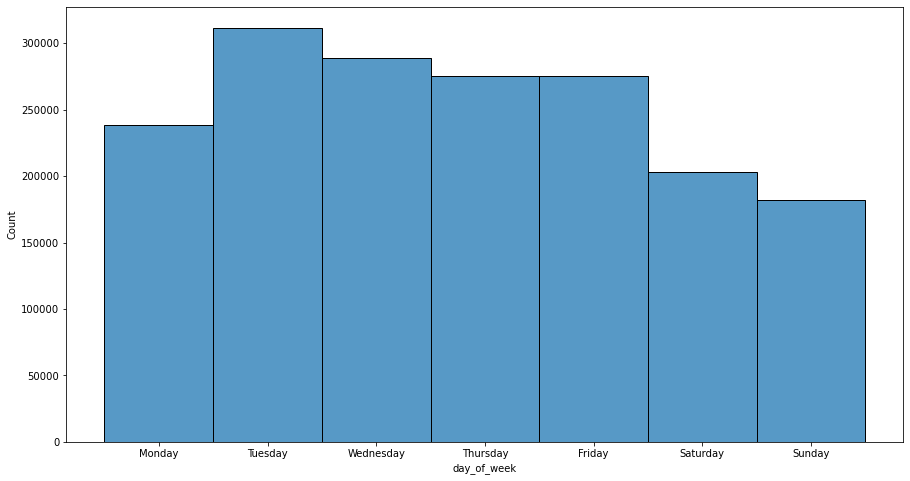

In [18]:
plt.figure(figsize=(15,8))
sns.histplot(traffic, x="day_of_week", kde=False, bins=7)

In [19]:
traffic['year'] = pd.DatetimeIndex(traffic['date_time']).year


In [20]:
traffic["Description"].value_counts(5)

DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS                   8.314860e-02
FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER                           4.572085e-02
DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGISTRATION                                       2.988616e-02
FAILURE OF INDIVIDUAL DRIVING ON HIGHWAY TO DISPLAY LICENSE TO UNIFORMED POLICE ON DEMAND    2.627745e-02
DRIVER USING HANDS TO USE HANDHELD TELEPHONE WHILEMOTOR VEHICLE IS IN MOTION                 2.434202e-02
                                                                                                 ...     
INADEQUATE TOWING DEVICE- SAFETY CHAINS WORN                                                 5.637729e-07
PROJECTED LOAD NO LIGHT-, ID LIGHT 1/3 REAR LEFT-, CLEARANCE LIGHT R REAR-INOPERATIVE        5.637729e-07
OPERATING MOTOR VEHICLE WITH INADEQUATE STEERING AXLES TIRE- left                            5.637729e-07
TRUCK RIGHT REAR TURN SIGNAL, ID LIGHT 1 OF 3 

###### Traffic Violations by Gender

In [21]:
traffic_gender = traffic['Gender'].value_counts()
traffic_gender

M    1191538
F     579635
U       2601
Name: Gender, dtype: int64

###### Traffic Violation by highest Violations 

In [22]:
traffic[['Day',"Description"]].value_counts().head(8)

Day        Description                                                               
Tuesday    DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS    27831
Wednesday  DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS    24272
Thursday   DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS    24153
Friday     DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS    23854
Monday     DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS    21533
Tuesday    FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER            14802
Saturday   DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS    13758
Wednesday  FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER            13295
dtype: int64

#### Find Violations with highest count and their location

In [23]:
traffic = traffic.drop(['Search Conducted', 'Search Disposition', 'Search Outcome', 'Search Reason', 'Search Reason For Stop', 'Search Type', 'Search Arrest Reason', 'Model', 'Article',
                        'Driver City', 'Driver State', 'DL State'], axis=1)

In [24]:
traffic[['Day',"Description","Location"]].value_counts().head()

Day       Description                                                                 Location                  
Friday    DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS  MAPLE @ ASPEN                 327
                                                                                      LELAND @ 46TH                 245
Tuesday   EXCEEDING MAXIMUM SPEED: 39 MPH IN A POSTED 30 MPH ZONE                     10901 WESTLAKE DRIVE          234
Sunday    EXCEEDING MAXIMUM SPEED: 39 MPH IN A POSTED 30 MPH ZONE                     10901 WESTLAKE DRIVE          219
Saturday  FAILURE TO STOP AT STOP SIGN                                                UNIVERSITY AVE @ OXFORD RD    209
dtype: int64

In [25]:
traffic.shape

(1773774, 38)

In [26]:
traffic[["Latitude","Longitude"]].value_counts().head(10)

Latitude   Longitude 
0.000000    0.000000     123428
39.045425  -76.990737       551
39.046277  -76.990695       431
39.109775  -76.910440       327
39.005618  -77.012328       268
39.110610  -76.989798       253
39.057555  -76.967827       210
39.003900  -77.036485       155
39.149278  -77.066620       128
39.077695  -77.046385       128
dtype: int64

In [27]:
traffic[["Location"]].value_counts().head(8)

Location                            
WAYNE AVE @ DALE DR                     2311
MONTGOMERY VILLAGE AVE @ RUSSELL AVE    2162
IS 370 @ IS 270                         1982
W/B IS 370 @ IS 270                     1884
WOODFIELD RD @ EMORY GROVE RD           1872
RT 28 @ BLACKBERRY DR                   1716
COLESVILLE RD @ GEORGIA AVE             1599
RIDGE RD @ OBSERVATION DR               1552
dtype: int64

In [28]:
month = traffic['month'] = pd.DatetimeIndex(traffic['date_time']).month
year = traffic['Year'] 
year_2010_2020 = traffic['Year'] > 2010

<AxesSubplot:xlabel='month', ylabel='Count'>

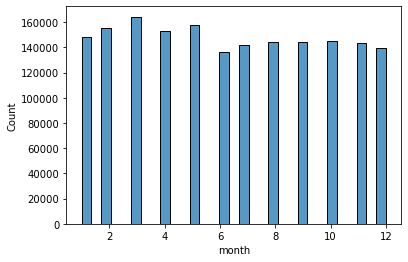

In [29]:
# plot month traffic violations
traffic.count()
sns.histplot(traffic['month'], kde=False, bins=31)

##### Plot traffic violations by the day of the month

In [30]:
day_of_month_violations = traffic['date_time'].dt.day
day_of_month_violations.head()

0    11
1    12
2    12
3    12
4    12
Name: date_time, dtype: int64

<AxesSubplot:xlabel='date_time', ylabel='Count'>

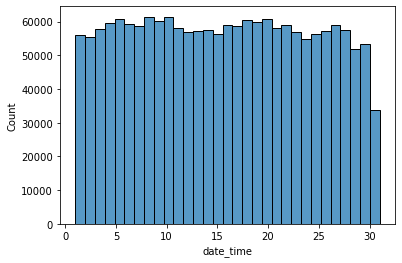

In [31]:
# remove na's
day_of_month_violations_plot = day_of_month_violations.dropna()
# plot the day of the month
sns.histplot(day_of_month_violations, kde=False, bins=31)

##### Traffic Violations by year

In [32]:
violation_year = traffic['date_time'].dt.year
traffic["violation_year"] = traffic['date_time'].dt.year
violation_year = traffic[["violation_year",'Race']]
violation_year.head()

,violation_year,Race
0,2019,BLACK
1,2019,WHITE
2,2019,BLACK
3,2019,BLACK
4,2019,BLACK


In [33]:
violation_year_count= traffic['violation_year'].value_counts().sort_index()
violation_year_count

2012    151375
2013    190519
2014    223784
2015    235370
2016    219758
2017    199170
2018    218287
2019    188600
2020     72320
2021     63689
2022     10902
Name: violation_year, dtype: int64

<AxesSubplot:ylabel='violation_year'>

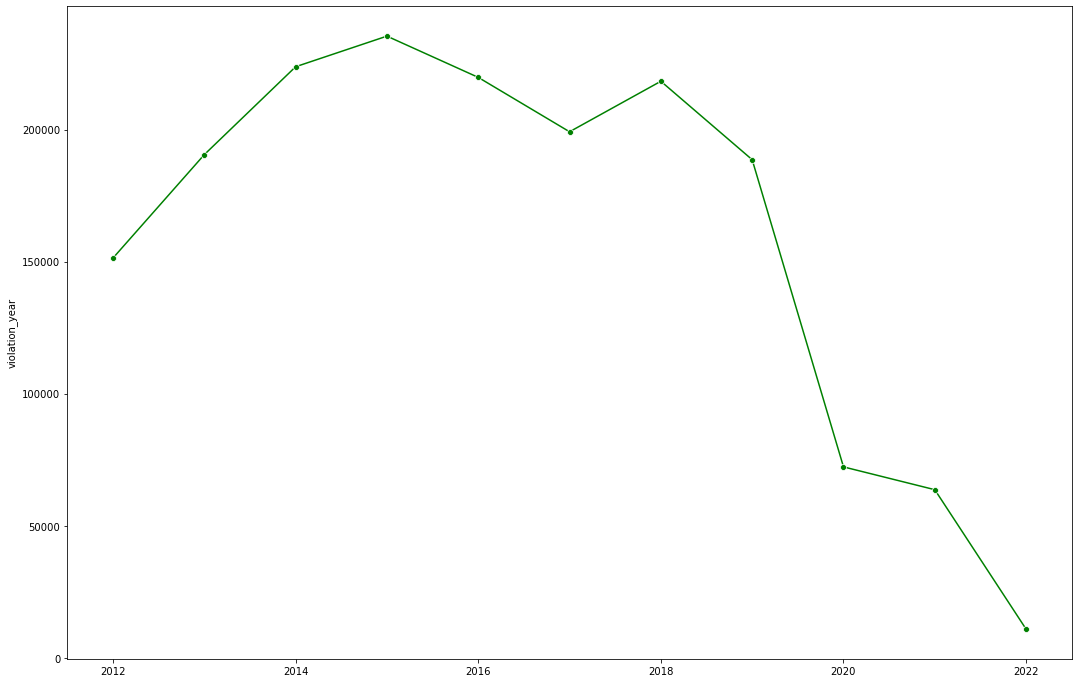

In [34]:
plt.figure(figsize=(18,12))
sns.lineplot(data=violation_year_count, ci=None, color="green", marker='o')

##### Plot the number of traffic violations by race

In [35]:
traffic_by_day = traffic['Day'].value_counts()

In [36]:
accidents_by_race = traffic[["Accident","Race"]].value_counts()
accidents_by_race

Accident  Race           
No        WHITE              597359
          BLACK              551935
          HISPANIC           374477
          OTHER              100935
          ASIAN               99256
Yes       WHITE               16765
          HISPANIC            13035
          BLACK               11706
No        NATIVE AMERICAN      3206
Yes       ASIAN                2616
          OTHER                2391
          NATIVE AMERICAN        93
dtype: int64

<AxesSubplot:xlabel='Race', ylabel='Count'>

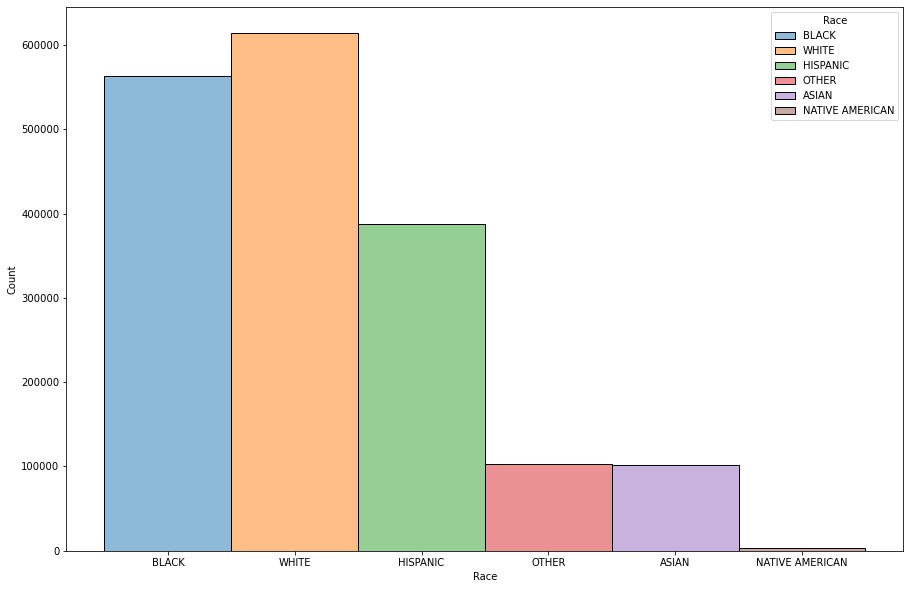

In [37]:
 plt.figure(figsize=(15,10))
 sns.histplot(traffic, x = "Race", hue='Race', kde=False, bins=50)

In [38]:
race = traffic['Race']
accidents = traffic['Accident']

##### Calculate and plot the percentage of accidents

In [39]:
accidents = traffic["Accident"]
accidents.value_counts()

No     1727168
Yes      46606
Name: Accident, dtype: int64

In [40]:
traffic[["Accident",'Date Of Stop']].value_counts()

Accident  Date Of Stop
No        03/17/2015      1270
          04/10/2018      1251
          05/20/2014      1193
          03/05/2019      1176
          04/18/2018      1175
                          ... 
Yes       08/05/2020         1
          02/23/2022         1
          08/18/2021         1
          07/29/2020         1
          05/19/2021         1
Length: 7346, dtype: int64

In [41]:
traffic[["Accident",'Alcohol']].value_counts()

Accident  Alcohol
No        No         1724898
Yes       No           46432
No        Yes           2270
Yes       Yes            174
dtype: int64

In [42]:
traffic_with_accidents = traffic.loc[traffic["Accident"] == "Yes"]
traffic_with_accidents[['Accident','Location','Date Of Stop']].value_counts().head(3)

Accident  Location                        Date Of Stop
Yes       3400 MAY ST                     02/01/2015      40
          NEW HAMPSHIRE AVE @ OAKLAWN DR  01/06/2020      38
          CLARA BARTON PKWY               03/06/2019      32
dtype: int64

In [43]:
accident_counts = accidents.value_counts(normalize = True)*100
accident_counts

No     97.372495
Yes     2.627505
Name: Accident, dtype: float64

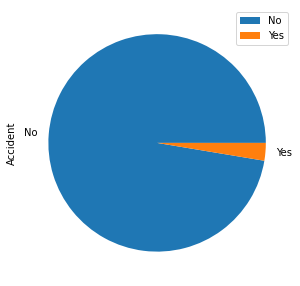

In [44]:
accident_pie_plot = accident_counts.plot.pie( y='accidents',figsize=(5, 5))
plt.legend()

In [45]:
# Gtt most violations by Location 
# Get years of violations 
# Get violations by "DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS"
# Get most violations by day of week

In [46]:
traffic_n_sip = traffic.loc[traffic["Alcohol"] == "Yes"]
traffic_n_sip[['Alcohol','Location']].value_counts()

Alcohol  Location                            
Yes      RIDGE RD AND BETHESDA CHURCH RD         77
         WOODFIELD ROAD AND FIELDCREST ROAD      57
         RIDGE ROAD AND BRINK ROAD               55
         RIDGE ROAD AND SKYLARK ROAD             49
         RIDGE ROAD AND BETHESDA CHURCH ROAD     43
                                                 ..
         TECH ROAD/ INDUSTRIAL RD                 1
         GEORGIA  AVE / RANDOLPH RD               1
         UNIVERSITY BLVD @ COLESVILLE RD          1
         ARLINGTON RD @ ELM ST                    1
         LITTLE SENECA PARKWAY / GRAYSQUIRREL     1
Length: 304, dtype: int64

In [47]:
traffic_n_sip[['Alcohol','Day','Location']].value_counts()

Alcohol  Day        Location                           
Yes      Monday     RIDGE ROAD AND BRINK ROAD              29
         Wednesday  RIDGE ROAD AND SKYLARK ROAD            28
         Saturday   VEIRS MILL RD @ NEWPORT MILL RD        26
         Sunday     WHITES FERRY RD/WASCHE RD              25
         Thursday   WOODFIELD ROAD AND FIELDCREST ROAD     23
                                                           ..
         Sunday     SB NEW HAMPSHIRE AVE @ SCHINDLER DR     1
         Tuesday    ROCKVILLE PIKE @ ELMSHIRST RD           1
         Saturday   TECH ROAD/ INDUSTRIAL RD                1
         Friday     11030 BRINK RD                          1
         Wednesday  GEORGIA  AVE / RANDOLPH RD              1
Length: 348, dtype: int64

In [48]:
traffic_n_sip[['Alcohol','Location','Day']].value_counts()

Alcohol  Location                         Day      
Yes      RIDGE ROAD AND BRINK ROAD        Monday       29
         RIDGE ROAD AND SKYLARK ROAD      Wednesday    28
         VEIRS MILL RD @ NEWPORT MILL RD  Saturday     26
         WHITES FERRY RD/WASCHE RD        Sunday       25
         RIDGE RD AND BETHESDA CHURCH RD  Tuesday      23
                                                       ..
         GEORGIA  AVE / RANDOLPH RD       Wednesday     1
         GARLAND AVE AND DOMER AVE        Thursday      1
         355 AND ELM ST                   Saturday      1
         NB GEORGIA @ TILTON DR           Thursday      1
         SHADY GROVE RD @ MD 355          Wednesday     1
Length: 348, dtype: int64

In [49]:
traffic_n_sip[['Alcohol','Location']].value_counts()

Alcohol  Location                            
Yes      RIDGE RD AND BETHESDA CHURCH RD         77
         WOODFIELD ROAD AND FIELDCREST ROAD      57
         RIDGE ROAD AND BRINK ROAD               55
         RIDGE ROAD AND SKYLARK ROAD             49
         RIDGE ROAD AND BETHESDA CHURCH ROAD     43
                                                 ..
         TECH ROAD/ INDUSTRIAL RD                 1
         GEORGIA  AVE / RANDOLPH RD               1
         UNIVERSITY BLVD @ COLESVILLE RD          1
         ARLINGTON RD @ ELM ST                    1
         LITTLE SENECA PARKWAY / GRAYSQUIRREL     1
Length: 304, dtype: int64

#### Calculate the percentage of the drinking traffic violations

In [50]:
drinking_traffic = traffic['Alcohol']
drinking_traffic.value_counts()

No     1771330
Yes       2444
Name: Alcohol, dtype: int64

In [51]:
drinking_percent = drinking_traffic.value_counts(normalize = True)*100
drinking_percent 

No     99.862215
Yes     0.137785
Name: Alcohol, dtype: float64

In [52]:
missing_values_count = traffic.isnull().sum()

total_cells = np.product(traffic.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing

percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.04322844962210518


 ##### Remove the columns and rows that aren't needed

In [53]:
missing_values_count[:]

SeqID                          0
Date Of Stop                   0
Time Of Stop                   0
Agency                         0
SubAgency                      0
Description                   10
Location                       2
Latitude                       0
Longitude                      0
Accident                       0
Belts                          0
Personal Injury                0
Property Damage                0
Fatal                          0
Commercial License             0
HAZMAT                         0
Commercial Vehicle             0
Alcohol                        0
Work Zone                      0
State                         59
VehicleType                    0
Year                       10217
Make                          66
Color                      20317
Violation Type                 0
Charge                         0
Contributed To Accident        0
Race                           0
Gender                         0
Arrest Type                    0
Geolocatio

In [54]:
traffic = traffic.dropna()

In [55]:
loc_data = traffic[['Location',"Latitude","Longitude"]]
loc_data.value_counts()

Location                              Latitude   Longitude 
URBANA DR / RT 97                     0.000000    0.000000     531
PLYERS MILL RD AT LEXINGTON ST        0.000000    0.000000     239
MONTGOMERY VILLAGE AVE @ RUSSELL AVE  0.000000    0.000000     191
NEW HAMPSHIRE AVE / ROSEMERE AVE      0.000000    0.000000     170
WAYNE @ MANSFIELD                     0.000000    0.000000     152
                                                              ... 
GERMANTOWN/ DAWSON FARM               39.171803  -77.277847      1
                                      39.175342  -77.271320      1
GERMANTOWN/ FATHER HURLEY             39.167268  -77.280588      1
                                      39.167502  -77.281465      1
�MIDDLEBROOK RD AT GERMANTOWN RD      39.179383  -77.266055      1
Length: 902430, dtype: int64

#### Notice how some of the Latitude and Longtitude locations are missing as we analyze and plot the Locations (the missing Latitude and Longtitude locations report as 0.0)

In [56]:
traffic_locations = traffic[["Latitude", "Longitude", "Location"]]
traffic_locations.head()

,Latitude,Longitude,Location
0,38.989743,-77.097770,CORDELL ST @ NORFOLK AVE.
1,39.174110,-77.246170,NBI270 AT MIDDLEBROOK RD
2,39.182015,-77.238221,MIDDLEBROOK AN 355
3,39.160508,-77.284023,GERMANTOWN RD AND ALE HOUSE
4,38.984247,-77.090548,EASTWEST/ 355


 #### Plot a map wit markers

In [57]:
traffic_n_sip[['Location','Latitude','Longitude']].value_counts()

Location                                  Latitude   Longitude 
RIDGE ROAD AND BRINK ROAD                 0.000000    0.000000     27
VEIRS MILL RD @ NEWPORT MILL RD           0.000000    0.000000     26
WHITES FERRY RD/WASCHE RD                 39.146036  -77.411927    25
NEW HAMPSHIRE AVE @ NORWOOD RD            39.062942  -77.054518    22
GEORGIA AVE / ROSSMOOR BLVD               39.061125  -77.044087    18
                                                                   ..
VEIRS MILL RD @ NEWPORT MILL RD (PURSUIT  0.000000    0.000000      1
NB GEORGIA @ TILTON DR                    39.018432  -77.043457     1
NB GREAT SENECA AT MUDDY BRANCH           0.000000    0.000000      1
BROADBIRCH DR/ BOURNEFIELD WAY            39.055994  -76.965927     1
OL 495 @ CONN. AVE                        39.101552  -77.002350     1
Length: 381, dtype: int64

##### Using List Comprehension create a heatmap of the DUI Violations

In [58]:
#List Comprehension 
s = fm.Map(location=[39.146036, -77.411927], tiles='Stamen Toner', zoom_start=10)
heat_data = [[row['Latitude'],row['Longitude']] for index, row in traffic_n_sip.iterrows()]
HeatMap(heat_data).add_to(s)
s

#### The drinking and driving areas are most common in the same regions

#### Conclusion:
White males in Montgomery county are more subject to traffic violations. Black cars are seen as a major target for cars in traffic violation stops in Montgomery County. Accidents are more common on occasions such as sport games in Montgomery County.Driving under the influence violations were more common on Thursdays in Montgomery County. 